# DATA PREPROCESSING

In [1]:

import numpy as np 
import pandas as pd 

# for graph
import matplotlib.pyplot as plt
import seaborn as sns
# for ML related
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
from scipy.io import arff
ASD=arff.loadarff('Autism-Child-Data.arff')
ASD=pd.DataFrame(ASD[0])
ASD.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'1',b'0',b'0',...,b'm',b'Others',b'no',b'no',b'Jordan',b'no',5.0,b'4-11 years',b'Parent',b'NO'
1,b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'1',b'0',b'0',...,b'm',b'Middle Eastern ',b'no',b'no',b'Jordan',b'no',5.0,b'4-11 years',b'Parent',b'NO'
2,b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'1',b'0',b'0',...,b'm',b'?',b'no',b'no',b'Jordan',b'yes',5.0,b'4-11 years',b'?',b'NO'
3,b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'1',...,b'f',b'?',b'yes',b'no',b'Jordan',b'no',4.0,b'4-11 years',b'?',b'NO'
4,b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',...,b'm',b'Others',b'yes',b'no',b'United States',b'no',10.0,b'4-11 years',b'Parent',b'YES'


In [3]:
def decode (df_name):
    for col_name in df_name.columns:
        if df_name[col_name].dtype != 'float64':
            df_name[col_name]=df_name[col_name].apply(lambda col: col.decode('utf-8'))
    return df_name
ASD=decode(ASD)
ASD.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5.0,4-11 years,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,Middle Eastern,no,no,Jordan,no,5.0,4-11 years,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,?,no,no,Jordan,yes,5.0,4-11 years,?,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,?,yes,no,Jordan,no,4.0,4-11 years,?,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10.0,4-11 years,Parent,YES


In [4]:
print(ASD.shape)

(292, 21)


In [5]:
ASD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         292 non-null    object 
 1   A2_Score         292 non-null    object 
 2   A3_Score         292 non-null    object 
 3   A4_Score         292 non-null    object 
 4   A5_Score         292 non-null    object 
 5   A6_Score         292 non-null    object 
 6   A7_Score         292 non-null    object 
 7   A8_Score         292 non-null    object 
 8   A9_Score         292 non-null    object 
 9   A10_Score        292 non-null    object 
 10  age              288 non-null    float64
 11  gender           292 non-null    object 
 12  ethnicity        292 non-null    object 
 13  jundice          292 non-null    object 
 14  austim           292 non-null    object 
 15  contry_of_res    292 non-null    object 
 16  used_app_before  292 non-null    object 
 17  result          

In [6]:
print(ASD.duplicated().sum())

2


In [7]:
ASD.drop_duplicates(inplace=True)
print(ASD.duplicated().sum())

0


In [8]:
print(ASD.isnull().sum())

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                4
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64


In [9]:
ASD['ethnicity'].value_counts()

White-European     108
Asian               44
?                   43
Middle Eastern      27
South Asian         21
Others              14
Black               14
Latino               8
Hispanic             7
Pasifika             2
Turkish              2
Name: ethnicity, dtype: int64

In [10]:
ASD['relation'].value_counts()

Parent                      212
?                            43
Relative                     17
Health care professional     13
Self                          4
self                          1
Name: relation, dtype: int64

In [11]:
ASD['ethnicity']=ASD['ethnicity'].apply(lambda val:None if val == '?' else val).fillna(method='backfill')
ASD['relation']=ASD['relation'].apply(lambda val: None if val == '?' else val).fillna(method='backfill')

In [12]:
print(ASD['ethnicity'].value_counts())
print(ASD['relation'].value_counts())

White-European     128
Asian               49
Middle Eastern      35
South Asian         23
Others              20
Black               14
Hispanic             9
Latino               8
Pasifika             2
Turkish              2
Name: ethnicity, dtype: int64
Parent                      249
Relative                     18
Health care professional     15
Self                          5
self                          3
Name: relation, dtype: int64


<AxesSubplot:xlabel='age', ylabel='Count'>

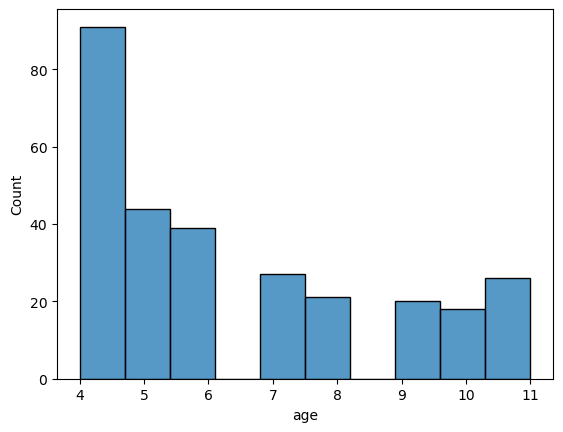

In [13]:
sns.histplot(ASD.age)

In [14]:
ASD['age']=ASD['age'].fillna(ASD['age'].mode()[0])

In [15]:
print(ASD.isnull().sum())

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64


# DATA VISUALIZATION

Text(0.5, 1.0, 'Distribution of ASD')

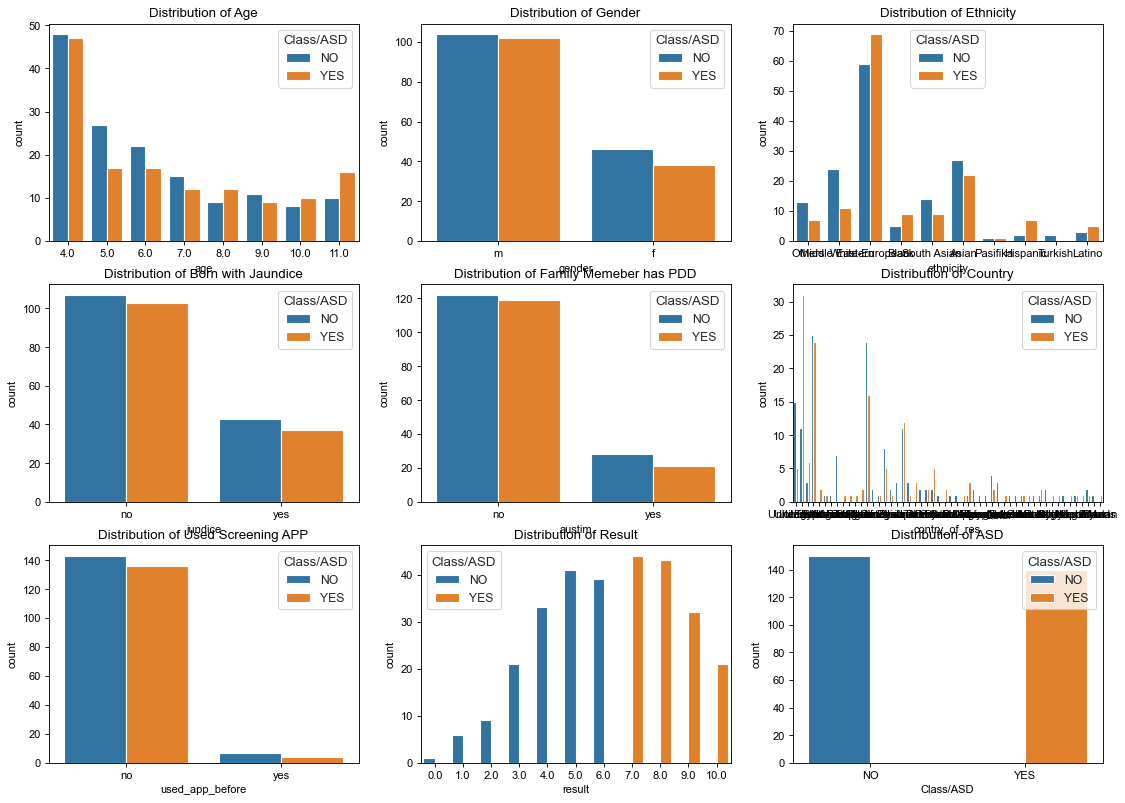

In [16]:
fig, axarr = plt.subplots(3, 3, figsize=(17,12), dpi=80, facecolor='w', edgecolor='k')
sns.set(style="white")
sns.countplot(x='age', hue = 'Class/ASD',data = ASD, ax=axarr[0][0], palette="tab10")
axarr[0][0].set_title('Distribution of Age')
sns.countplot(x='gender', hue = 'Class/ASD',data = ASD, ax=axarr[0][1], palette="tab10")
axarr[0][1].set_title('Distribution of Gender')
sns.countplot(x='ethnicity', hue = 'Class/ASD',data = ASD,ax=axarr[0][2], palette="tab10")
axarr[0][2].set_title('Distribution of Ethnicity')
sns.countplot(x='jundice', hue = 'Class/ASD',data = ASD,ax=axarr[1][0], palette="tab10")
axarr[1][0].set_title('Distribution of Born with Jaundice')
sns.countplot(x='austim', hue = 'Class/ASD',data = ASD, ax=axarr[1][1], palette="tab10")
axarr[1][1].set_title('Distribution of Family Memeber has PDD')
sns.countplot(x='contry_of_res', hue = 'Class/ASD',data = ASD, ax=axarr[1][2], palette="tab10")
axarr[1][2].set_title('Distribution of Country')
sns.countplot(x='used_app_before', hue = 'Class/ASD',data = ASD, ax=axarr[2][0], palette="tab10")
axarr[2][0].set_title('Distribution of Used Screening APP')
sns.countplot(x='result', hue = 'Class/ASD',data = ASD, ax=axarr[2][1], palette="tab10")
axarr[2][1].set_title('Distribution of Result')
sns.countplot(x='Class/ASD', hue = 'Class/ASD',data = ASD, ax=axarr[2][2], palette="tab10")
axarr[2][2].set_title('Distribution of ASD')

# LABEL ENCODING

In [17]:
le = LabelEncoder()
ASD_new = ASD.copy()
for col in ASD_new.select_dtypes(include='O').columns:
    ASD_new[col]=le.fit_transform(ASD_new[col])
ASD_new.head(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,...,1,5,0,0,24,0,5.0,0,1,0
1,1,1,0,0,1,1,0,1,0,0,...,1,4,0,0,24,0,5.0,0,1,0
2,1,1,0,0,0,1,1,1,0,0,...,1,5,0,0,24,1,5.0,0,1,0
3,0,1,0,0,1,1,0,0,0,1,...,0,5,1,0,24,0,4.0,0,1,0
4,1,1,1,1,1,1,1,1,1,1,...,1,5,1,0,51,0,10.0,0,1,1
5,0,0,1,0,1,1,0,1,0,1,...,1,9,0,1,13,0,5.0,0,1,0
6,1,0,1,1,1,1,0,1,0,1,...,1,9,0,0,50,0,7.0,0,1,1
7,1,1,1,1,1,1,1,1,0,0,...,0,4,0,0,5,0,8.0,0,1,1
8,1,1,1,1,1,1,1,0,0,0,...,0,4,0,0,5,0,7.0,0,1,1
9,0,0,1,1,1,0,1,1,0,0,...,0,9,0,1,4,0,5.0,0,3,0


# FEATURE SELECTION

In [18]:
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# create predictors and target
Y=ASD_new['Class/ASD'] #outcome
X=ASD_new.drop(['Class/ASD','result'],axis=1)

# FEATURE SELECTION - Pearson Correlation

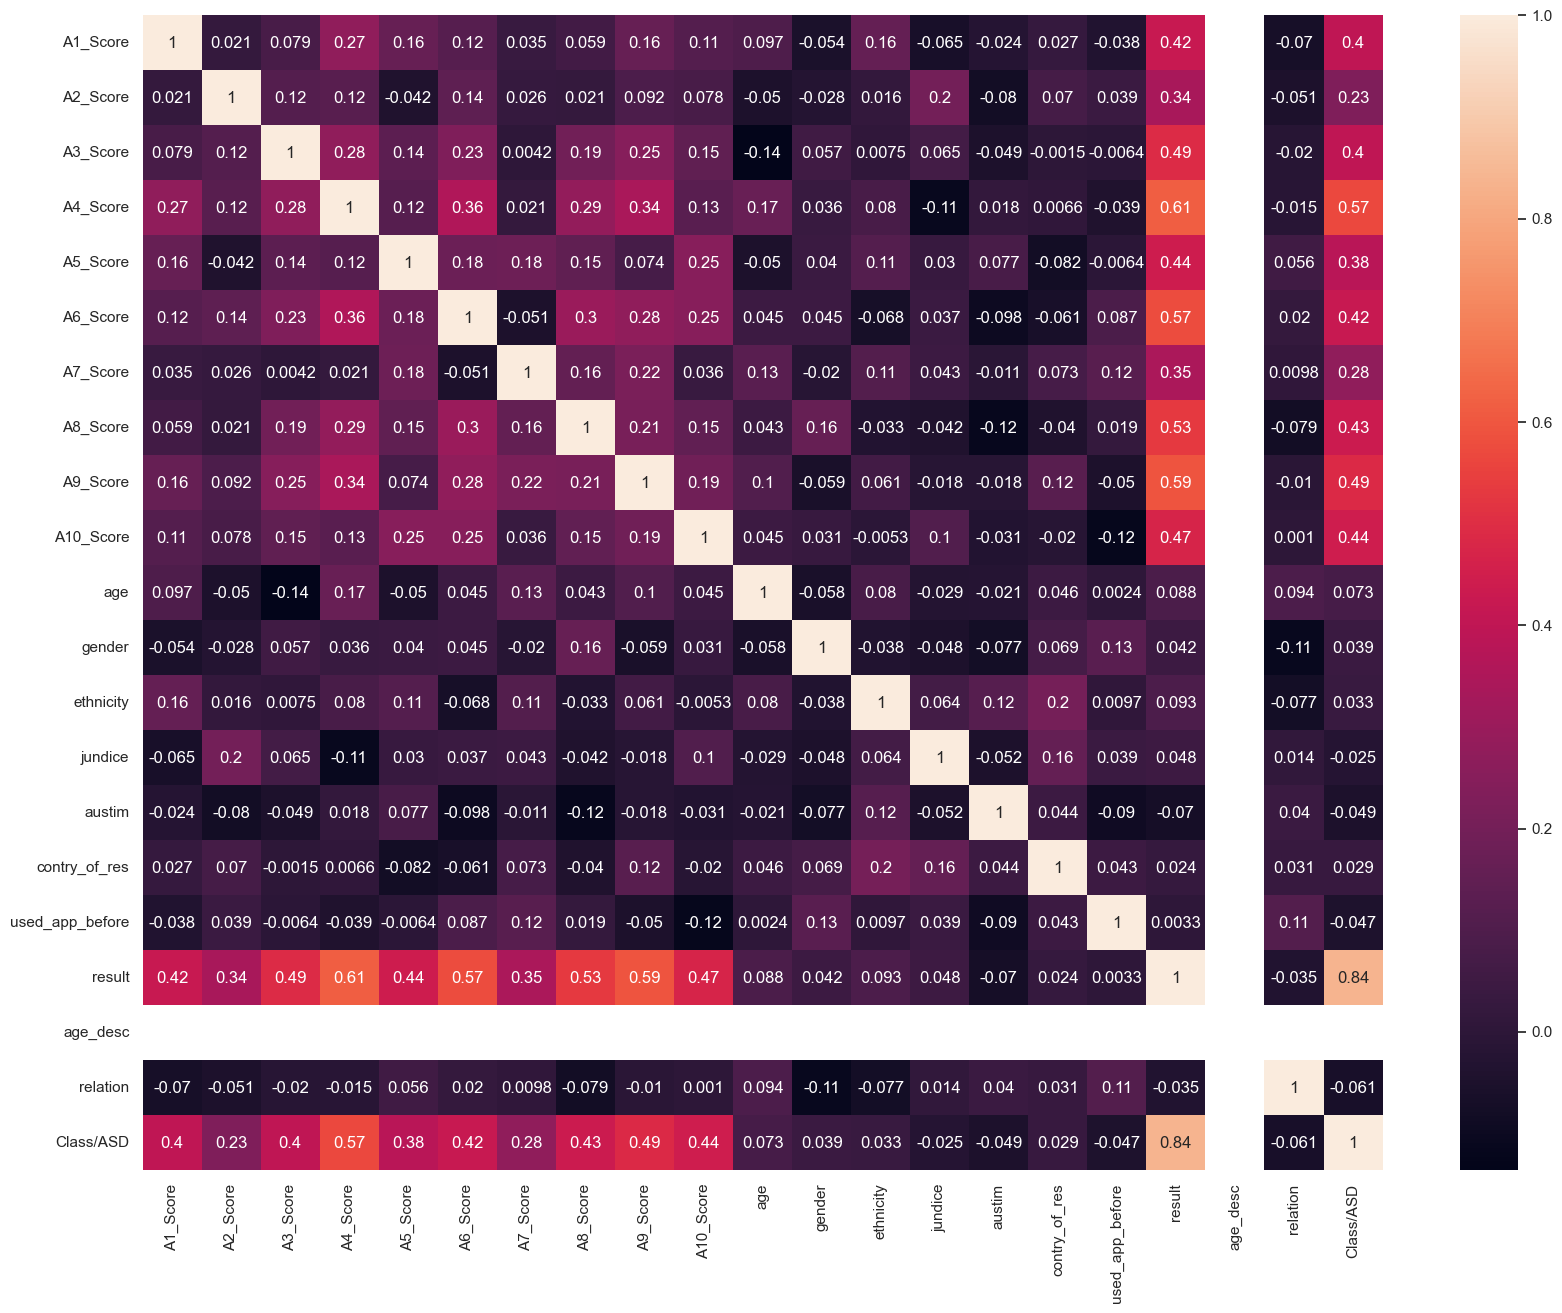

In [19]:
corr=ASD_new.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)
plt.show()

In [20]:
corr_value=abs(corr['Class/ASD'])
print(corr_value.sort_values(ascending=False))

Class/ASD          1.000000
result             0.836531
A4_Score           0.565557
A9_Score           0.489337
A10_Score          0.441890
A8_Score           0.434514
A6_Score           0.419145
A1_Score           0.397581
A3_Score           0.397244
A5_Score           0.381485
A7_Score           0.275321
A2_Score           0.231005
age                0.073482
relation           0.061352
austim             0.048896
used_app_before    0.047334
gender             0.038819
ethnicity          0.032591
contry_of_res      0.029282
jundice            0.025023
age_desc                NaN
Name: Class/ASD, dtype: float64


# FEATURE SELECTION - Chi Square Test

In [21]:
X_new=SelectKBest(score_func=chi2,k=5)
fit=X_new.fit(X,Y)

scores=-np.log10(fit.pvalues_)
print(scores)

[4.33522337 2.12530994 3.2356724  9.94660322 3.02046016 3.91266977
 2.50137663 6.81845963 8.57972066 4.11138572 0.62003493 0.14146216
 0.38920499 0.144545   0.34890678 0.9437905  0.36738547        nan
 0.22139633]


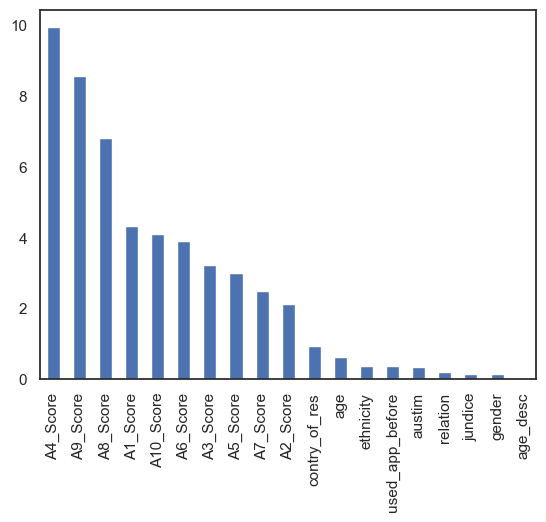

In [22]:
scores=pd.Series(scores,index=X.columns)
scores.sort_values(ascending=False,inplace=True)
scores.plot.bar()
plt.show()

# NAIVE BAYES CLASSIFIER

In [23]:
predictors=ASD_new[['A4_Score','A9_Score','A8_Score','A1_Score','A10_Score']]
target=ASD_new['Class/ASD']
# spliting into 70% training set and 30% testing set
pred_train, pred_test, tar_train, tar_test=train_test_split(predictors, target, test_size=.3, random_state=42)
# feature scaling
sc = StandardScaler()
pred_train = sc.fit_transform(pred_train)
pred_test = sc.transform(pred_test)
print(pred_train.shape, tar_train.shape)
print(pred_test.shape, tar_test.shape)

(203, 5) (203,)
(87, 5) (87,)


In [24]:
classifier=GaussianNB()
classifier.fit(pred_train,tar_train)
predictions=classifier.predict(pred_test)
# evaluate model by 10 fold cv
score=cross_val_score(classifier,predictors,target,cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))



0.87 accuracy with a standard deviation of 0.06


43 3 3 38


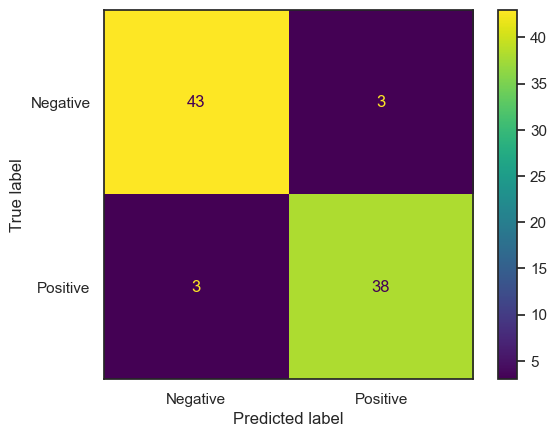

In [25]:
tn, fp, fn, tp = confusion_matrix(tar_test,predictions).ravel()
print(tn, fp, fn, tp)
#plot confusion matrix in rate
plot_confusion_matrix(classifier,pred_test,tar_test,display_labels=['Negative','Positive'])
plt.show()



In [26]:
prob= classifier.predict_proba(pred_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(tar_test, predictions)
roc_auc=auc(false_positive_rate,true_positive_rate)
print(roc_auc)

0.9308059384941676


# DECISION TREE CLASSIFIER

In [27]:
Y=ASD_new['Class/ASD'] #outcome
X=ASD_new.drop(['Class/ASD','result'],axis=1)

In [28]:
pred_train, pred_test, tar_train, tar_test=train_test_split(X, Y, test_size=.3,random_state=42)
# feature scaling
sc = StandardScaler()
pred_train = sc.fit_transform(pred_train)
pred_test = sc.transform(pred_test)
print(pred_train.shape, tar_train.shape)
print(pred_test.shape, tar_test.shape)

(203, 19) (203,)
(87, 19) (87,)


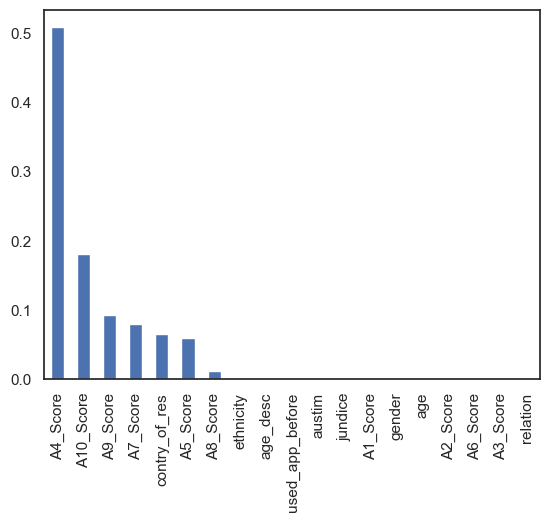

In [29]:
classifier=DecisionTreeClassifier(max_depth=3)
classifier=classifier.fit(pred_train,tar_train)
predictions=classifier.predict(pred_test)
feature_importance=pd.Series(classifier.feature_importances_,index=X.columns)
feature_importance.sort_values(ascending=False,inplace=True)
feature_importance.plot.bar()
plt.show()

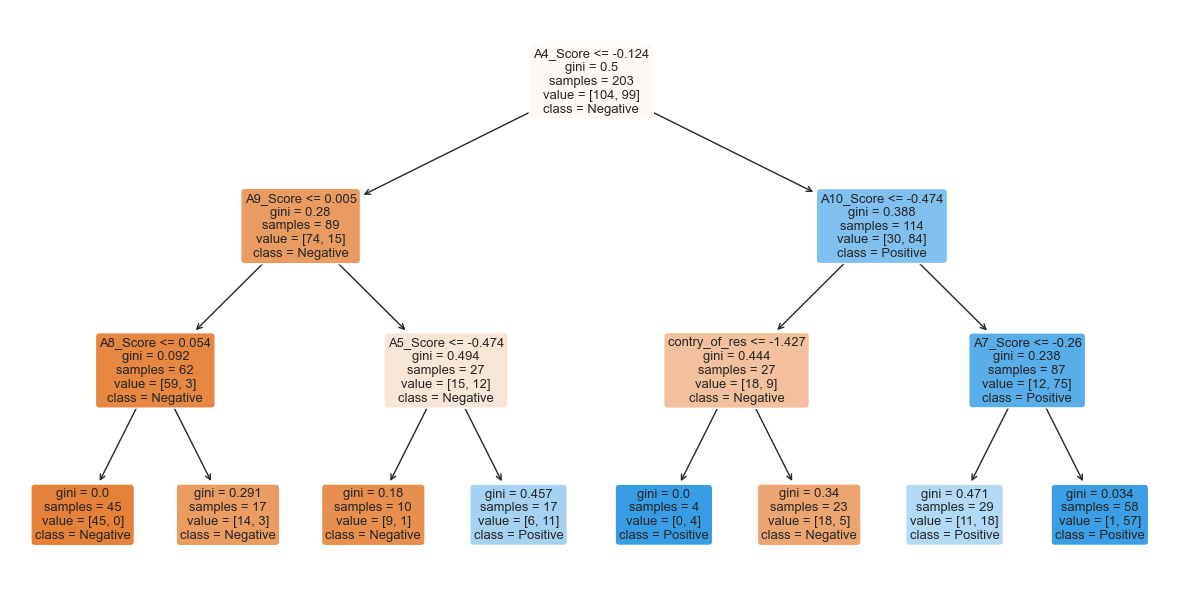

In [30]:
plt.figure(figsize=(15,7.5))
plot_tree(classifier,
filled=True,
rounded=True,
class_names=['Negative','Positive'],
feature_names=X.columns)
plt.show()

In [31]:
score=cross_val_score(classifier,X,Y,cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

0.82 accuracy with a standard deviation of 0.06


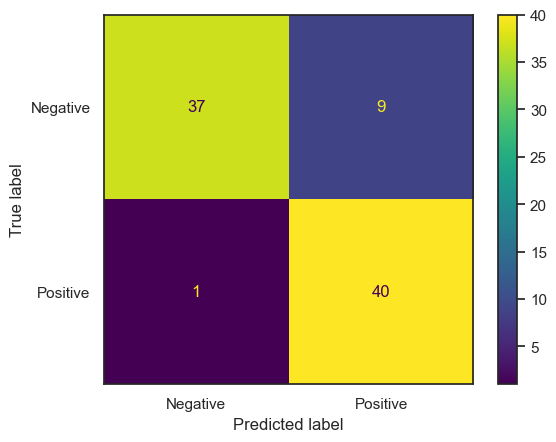

In [32]:
plot_confusion_matrix(classifier,pred_test,tar_test,display_labels=['Negative','Positive'])
plt.show()

In [33]:
rob= classifier.predict_proba(pred_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(tar_test, predictions)
roc_auc=auc(false_positive_rate,true_positive_rate)
print(roc_auc)

0.8899787910922587
